In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [23]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0], index_col=0)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [24]:
df = df[(df['value'].quantile(0.025) <= df['value']) &
        (df['value'] <= df['value'].quantile(0.975))]

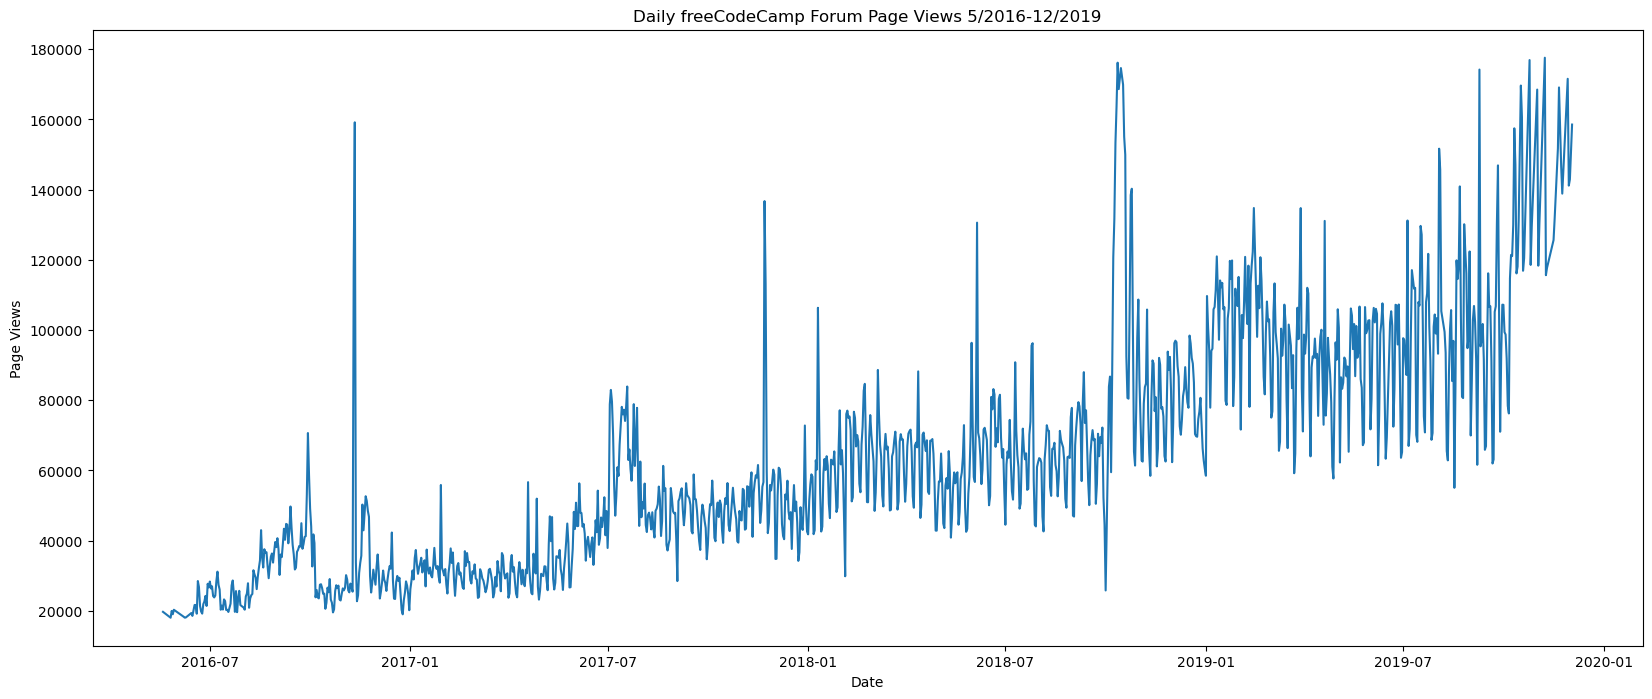

In [69]:
fig = plt.figure(figsize=(20,8))
sns.lineplot(data=df['value'])
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show()

Text(0, 0.5, 'Page Views')

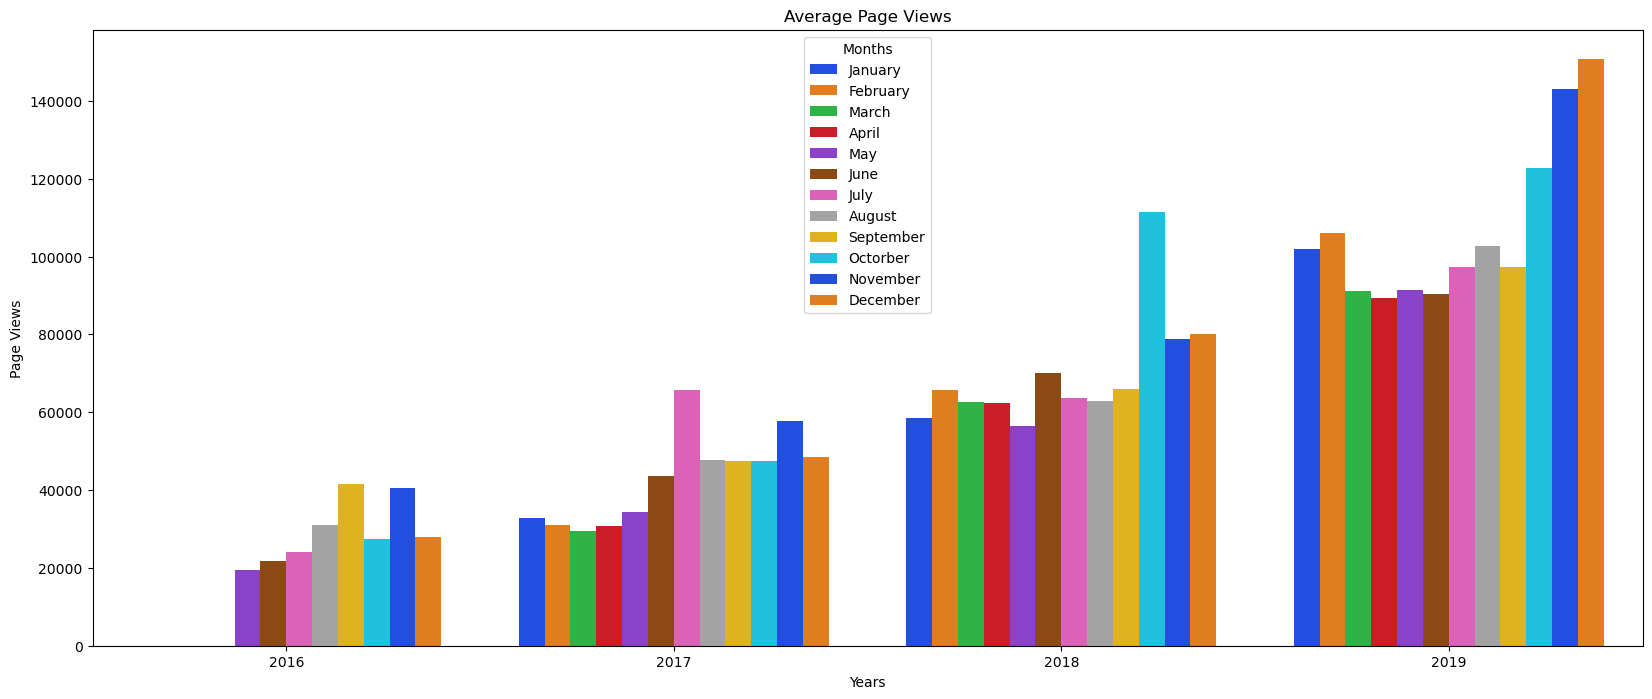

In [62]:
df['year'] = df.index.year
df['month'] = df.index.month
fig = plt.figure(figsize=(20,8))
sns.barplot(data=df, x='year', y='value', hue='month', palette='bright', errorbar=None)
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'Octorber', 'November', 'December'], title="Months")
plt.title("Average Page Views")
plt.xlabel('Years')
plt.ylabel('Page Views')

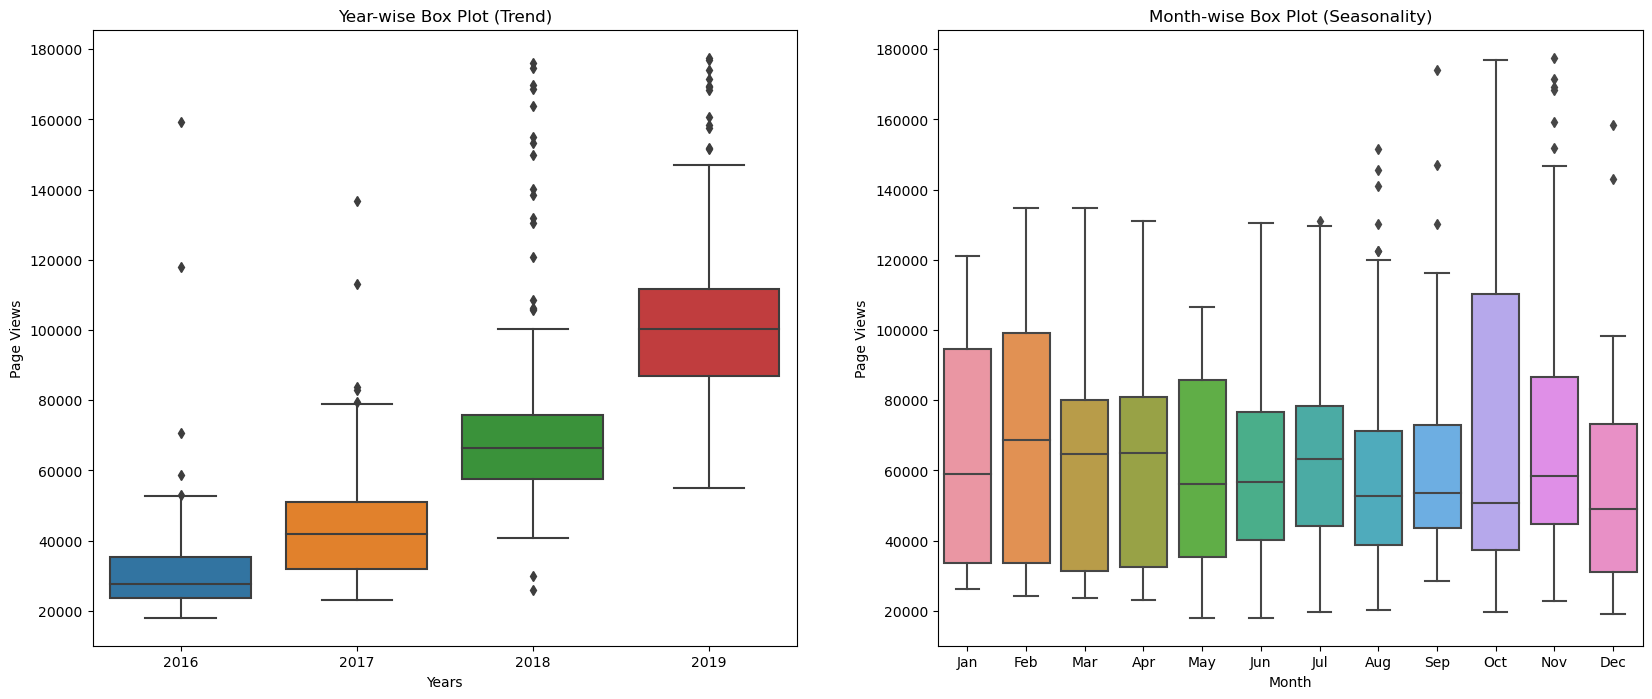

In [74]:
df_box = df.copy()
df_box['year'] = df_box.index.year
df_box['month'] = df_box.index.month

fig = plt.figure(figsize=(20,8))

plt.subplot(121)
sns.boxplot(data=df_box, x='year', y='value')
plt.title("Year-wise Box Plot (Trend)")
plt.xlabel('Years')
plt.ylabel('Page Views')

plt.subplot(122)
df_box['month-ascii'] = df_box.index.strftime("%b")
df_box.sort_values(by='month', inplace=True)
sns.boxplot(data=df_box, x='month-ascii', y='value')
plt.title("Month-wise Box Plot (Seasonality)")
plt.xlabel('Month')
plt.ylabel('Page Views')

fig.savefig('box_plot.png')